# Naive - Bayes Algorithm

The Naïve Bayes classifier is a supervised machine learning algorithm, which is used for classification tasks, like text classification. It is also part of a family of generative learning algorithms, meaning that it seeks to model the distribution of inputs of a given class or category. Unlike discriminative classifiers, like logistic regression, it does not learn which features are most important to differentiate between classes.

![](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/c5/88/Conditional_Probability.component.complex-narrative-xl.ts=1693933575362.png/content/adobe-cms/us/en/topics/naive-bayes/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative_888901862/items/content_group/image)

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## Handling Null values

In [6]:
dataset.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

There are no null values.

## Data Visualization

In [7]:
corr = dataset.corr()
corr

C:\Users\Siri\AppData\Local\Temp\ipykernel_21456\897440734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


C:\Users\Siri\AppData\Local\Temp\ipykernel_21456\2571642465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot = True)


<Axes: >

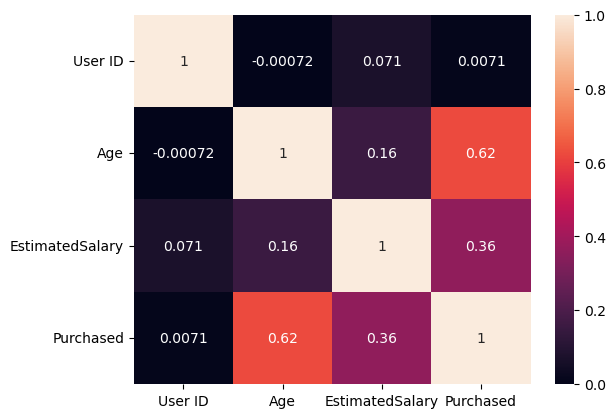

In [8]:
sns.heatmap(dataset.corr(), annot = True)

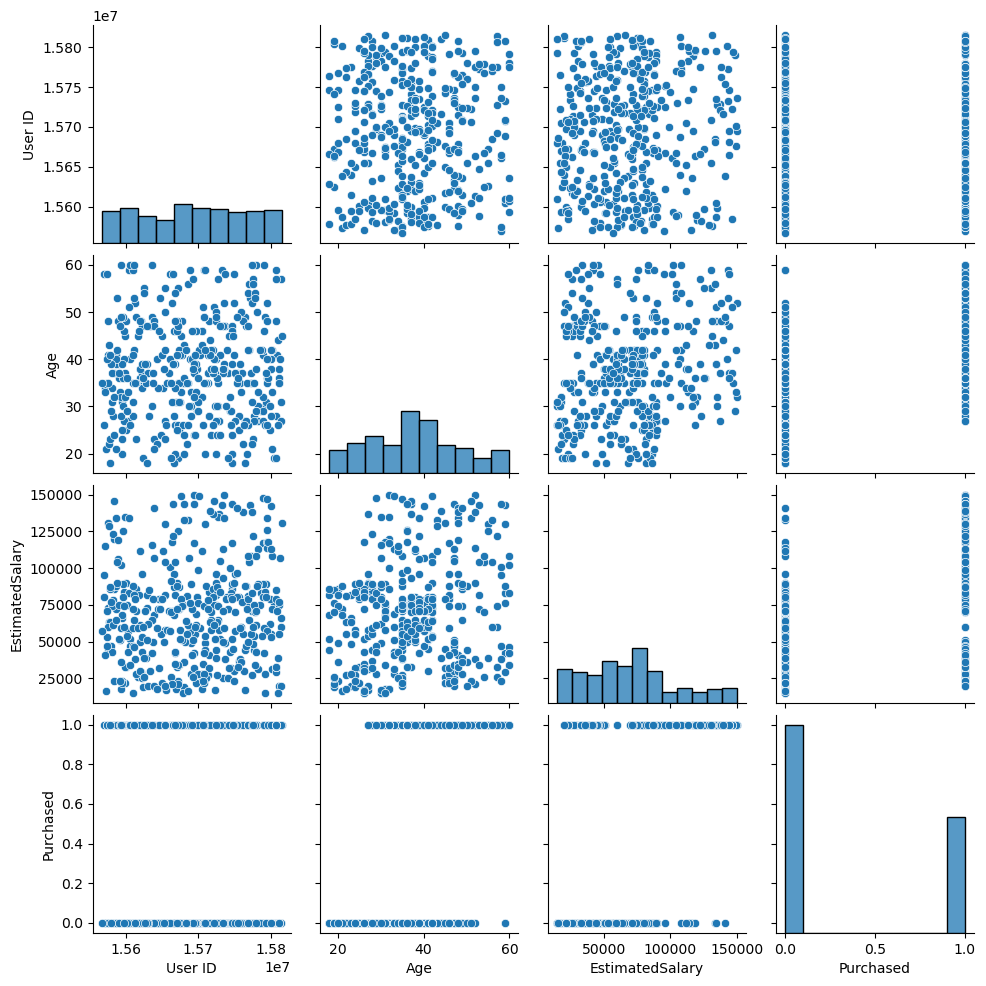

In [9]:
sns.pairplot(dataset)

<Axes: xlabel='Purchased', ylabel='Age'>

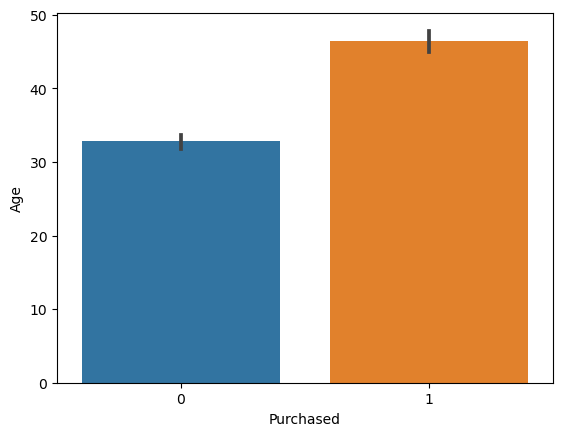

In [10]:
sns.barplot(x = dataset["Purchased"], y = dataset["Age"])

## Outlier Detection

sns.boxplot(dataset["EstimatedSalary"])

<Axes: >

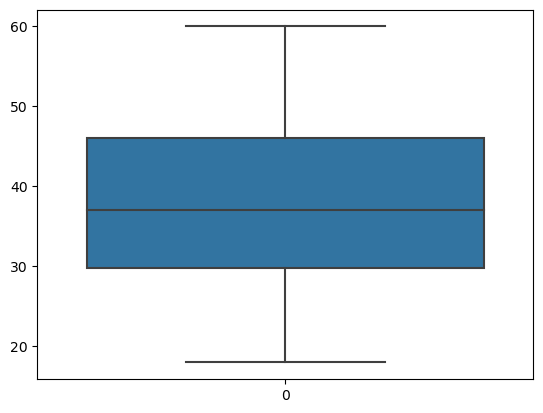

In [11]:
sns.boxplot(dataset["Age"])

We can see that there are no outliers.

## Separating Dependent and Independent variables

We can observe that _Purchased_ variable is an independent variable and _Gender_, _Salary_ and _EstimatedSalary_ are dependent variables.

In [12]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
X = dataset.iloc[:, 1:4]
X.head()

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000


In [14]:
Y = dataset["Purchased"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Encoding the categorical data

In [15]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [16]:
X["Gender"] = LE.fit_transform(X["Gender"])
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [17]:
encoding = dict(zip(LE.classes_, range(len(LE.classes_))))
encoding

{'Female': 0, 'Male': 1}

## Feature Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler
MS = MinMaxScaler()

In [19]:
X_Scaled = pd.DataFrame(MS.fit_transform(X), columns = X.columns)
X_Scaled.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


## Splitting the data into train and test sets

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_Scaled, Y, test_size = 0.2, random_state = 0)
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_train: (320, 3)
Shape of x_test: (80, 3)
Shape of y_train: (320,)
Shape of y_test: (80,)


## Model Building

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [22]:
model.fit(x_train, y_train)

GaussianNB()

In [23]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

## Evaluation of classification model

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
accuracy_score(y_test,pred)

0.925

In [25]:
confusion_matrix(y_test,pred)

array([[56,  2],
       [ 4, 18]], dtype=int64)

In [26]:
pd.crosstab(y_test,pred)

col_0,0,1
Purchased,,
0,56,2
1,4,18


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [28]:
probability = model.predict_proba(x_test)[:,1]
probability

array([0.09594722, 0.17250905, 0.13319495, 0.0867453 , 0.11006422,
       0.0397755 , 0.10289474, 0.96001318, 0.01138736, 0.47552608,
       0.04166895, 0.038873  , 0.12693701, 0.2483256 , 0.02202044,
       0.54027453, 0.18819633, 0.01840984, 0.99638606, 0.1255031 ,
       0.10968601, 0.9955861 , 0.26427056, 0.85586364, 0.02219279,
       0.99588402, 0.08729702, 0.06352284, 0.16436085, 0.14823868,
       0.02760159, 0.19908161, 0.88479016, 0.12527323, 0.01797509,
       0.00733794, 0.02379313, 0.09507891, 0.06537723, 0.63950154,
       0.06473084, 0.22571331, 0.06704559, 0.13223981, 0.84765854,
       0.03447917, 0.24195669, 0.89489814, 0.02680129, 0.75685276,
       0.99518415, 0.12139484, 0.11494184, 0.53134451, 0.97171174,
       0.41064893, 0.08621971, 0.05000663, 0.62237315, 0.02217703,
       0.0894389 , 0.93219677, 0.01318146, 0.35014257, 0.01326984,
       0.96534617, 0.05390512, 0.02803671, 0.19356393, 0.36455302,
       0.96759435, 0.1687751 , 0.01789066, 0.46767699, 0.06762

In [29]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

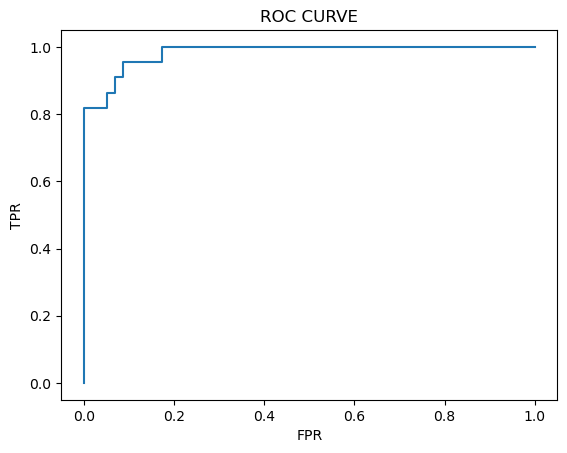

In [30]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()